In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = 7 * np.random.rand(100,1) - 2.8
y = 7 * np.random.rand(100,1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

df = pd.DataFrame()

df['x1'] = x.reshape(100)
df['x2'] = y.reshape(100)
df['y'] = z.reshape(100)

In [2]:
df

,x1,x2,y
0,-1.877635,-2.452318,10.297372
1,4.177198,-2.146864,22.829002
2,3.148979,-2.214041,13.830614
3,-1.380251,-2.534364,11.588747
4,1.519490,3.747131,17.594726
...,...,...,...
95,-1.822733,1.075598,6.418725
96,-1.525748,3.895492,19.504559
97,3.173224,1.500529,17.699764
98,0.411525,1.816052,7.245487


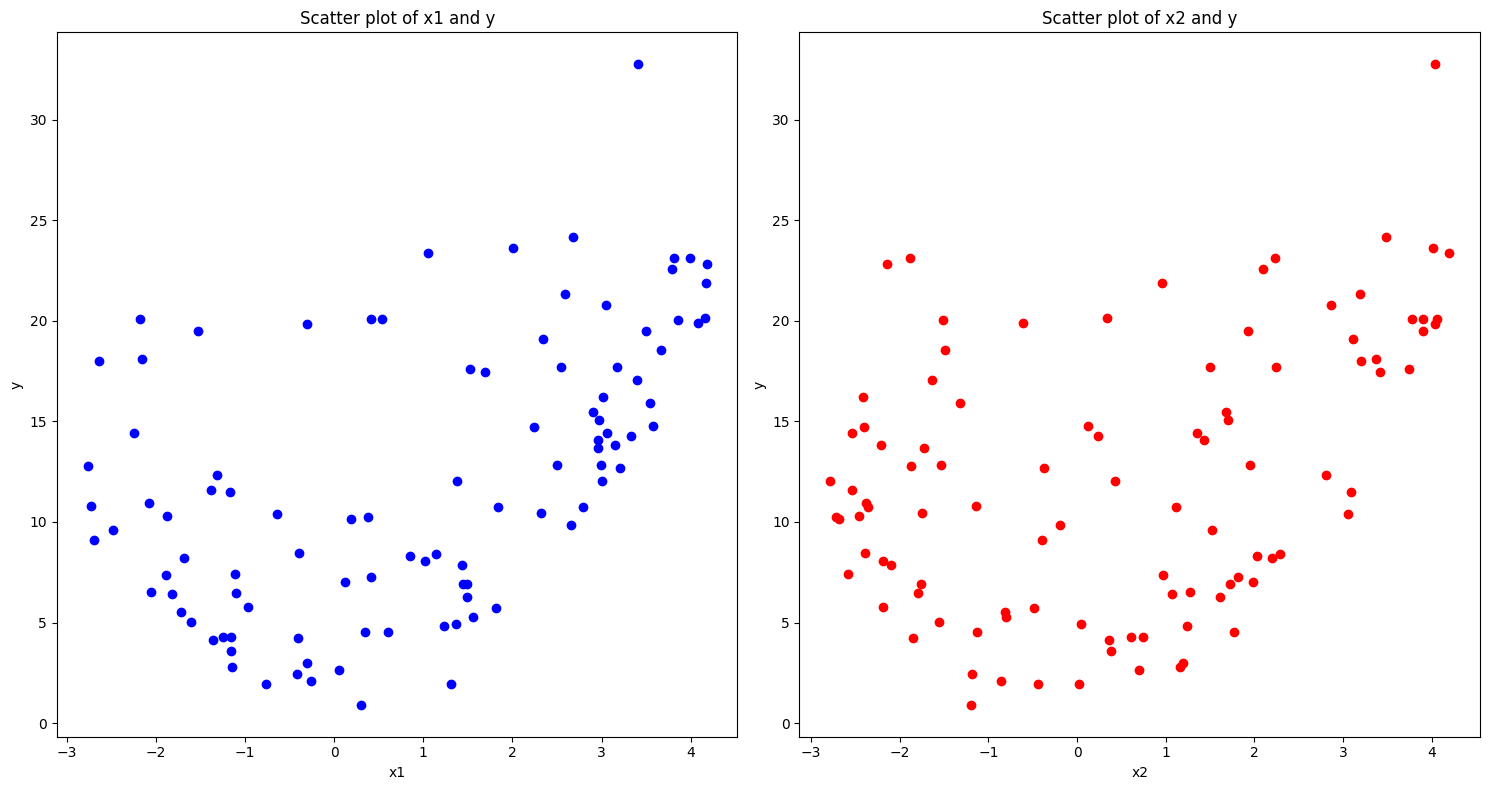

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,8))

# plot x1 and y
ax1.scatter(df['x1'],df['y'],color='blue')
ax1.set_title('Scatter plot of x1 and y')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

# plot x2 and y
ax2.scatter(df['x2'],df['y'],color='red')
ax2.set_title('Scatter plot of x2 and y')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

# Assumption  - Residual Plot

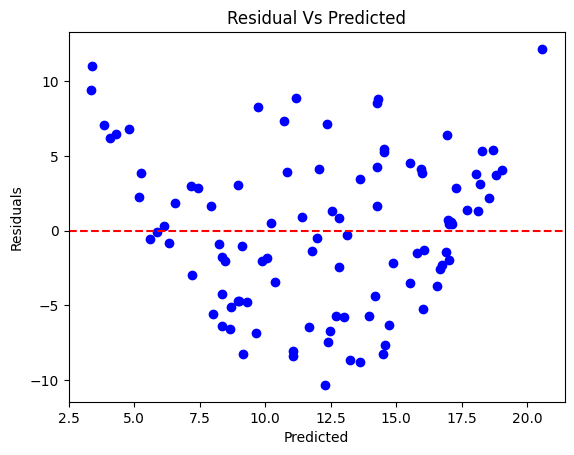

In [4]:
# Independent and Dependent variables
x = df[['x1', 'x2']]
y = df['y']

# fit linear regression model
lr = LinearRegression()
lr.fit(x,y)
# prediction
y_pred = lr.predict(x)
residuals = y - y_pred

# plot Residual values
plt.scatter(y_pred,residuals, color='blue')
plt.axhline(y = 0, color='red', linestyle='--')
plt.title('Residual Vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

# Assumption 1 - Adding Polynomial Term

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# split data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

# fit linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
# Predict
model_pred = model.predict(x_test)
# Calculate Metrics
model_r2 = r2_score(y_test, model_pred)
model_mse = mean_squared_error(y_test, model_pred)

# transform x_train and x_test into polynomial
poly_feature = PolynomialFeatures(degree=2)
x_train_poly = poly_feature.fit_transform(x_train)
x_test_poly = poly_feature.transform(x_test)

# fit linearRegression
poly_model = LinearRegression()
poly_model.fit(x_train_poly,y_train)
# predict
poly_pred = poly_model.predict(x_test_poly)

# Calculate metrics for polynomial model
poly_r2 = r2_score(y_test, poly_pred)
poly_mse = mean_squared_error(y_test, poly_pred)

# Compare model performance
print("Linear model")
print(f"R-squared: {model_r2:.4f}")
print(f"Mean Squared Error: {model_mse:.4f}")
print('='*35)

print("\nPolynomial model")
print(f"R-squared: {poly_r2:.4f}")
print(f"Mean Squared Error: {poly_mse:.4f}")
print('='*35)

Linear model
R-squared: 0.0898
Mean Squared Error: 25.6317

Polynomial model
R-squared: 0.9417
Mean Squared Error: 1.6420


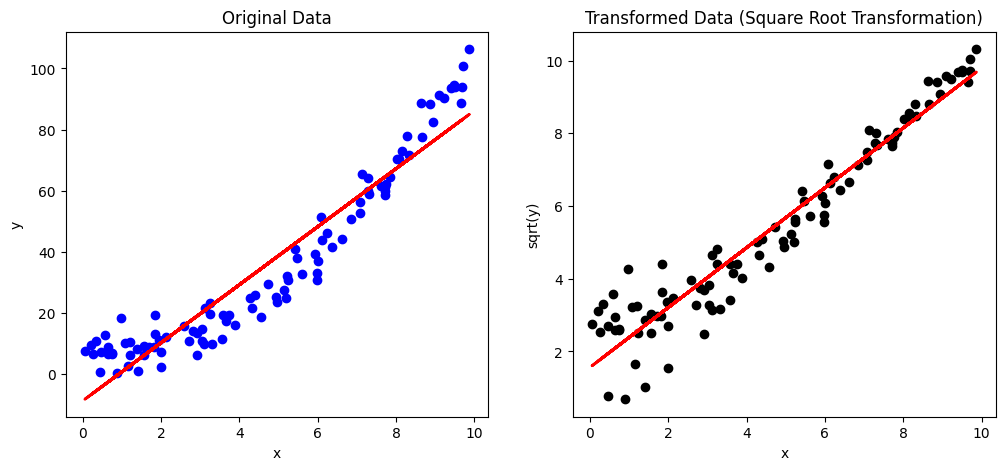

Original-linear-model
R-squared: 0.9008

Transformed-linear-model
R-squared: 0.9291


In [7]:
# Generate a non-linear dataset with a quadratic relationship
np.random.seed(42)
x = 10 * np.random.rand(100, 1)
y = x**2 + 5 + np.random.normal(0, 5, (100, 1))

# Ensure y is non-negative
y = np.abs(y)

# Apply square root transformation to y
y_sqrt = np.sqrt(y)

# Fit linear regression models for the original and transformed data
linear_model_original = LinearRegression()
linear_model_original.fit(x, y)

# fir linearregression on transform data
linear_model_transformed = LinearRegression()
linear_model_transformed.fit(x, y_sqrt)

# Predictions
y_pred_original = linear_model_original.predict(x)
y_pred_transformed = linear_model_transformed.predict(x)

# Visualize the relationship between x and y before and after transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before transformation
ax1.scatter(x, y, color='blue')
ax1.plot(x, y_pred_original, color='red', linewidth=2)
ax1.set_title('Original Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# After transformation
ax2.scatter(x, y_sqrt, color='black')
ax2.plot(x, y_pred_transformed, color='red', linewidth=2)
ax2.set_title('Transformed Data (Square Root Transformation)')
ax2.set_xlabel('x')
ax2.set_ylabel('sqrt(y)')

plt.show()

# Calculate R-squared and Mean Squared Error
r2_original = r2_score(y, y_pred_original)
r2_transformed = r2_score(y_sqrt, y_pred_transformed)

# Compare the performance of the original and transformed models
print("Original-linear-model")
print(f"R-squared: {r2_original:.4f}")

print("\nTransformed-linear-model")
print(f"R-squared: {r2_transformed:.4f}")


# Assumption - Applying Polynomial Regression

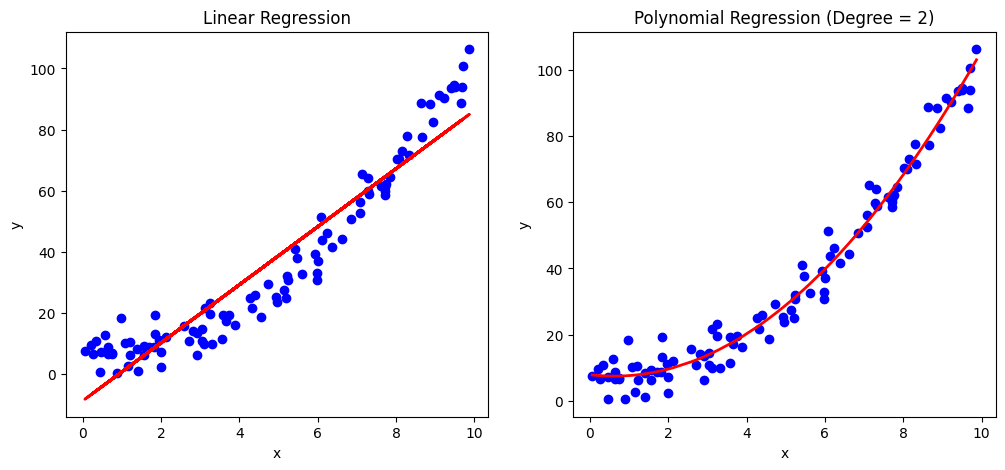


Linear-regression
R-squared: 0.9008

Polynomial-regression (degree = 2)
R-squared: 0.9782


In [10]:

from sklearn.preprocessing import PolynomialFeatures


# Generate a non-linear dataset with a quadratic relationship
np.random.seed(42)
x = 10 * np.random.rand(100, 1)
y = x**2 + 5 + np.random.normal(0, 5, (100, 1))

# Ensure y is non-negative
y = np.abs(y)

# Fit linear regression model
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_linear = linear_model.predict(x)

# Fit polynomial regression model (degree = 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly, y)
y_pred_poly = poly_model.predict(x_poly)

# Visualize the fitted lines for linear and polynomial regression
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Linear regression
ax1.scatter(x, y, color='blue')
ax1.plot(x, y_pred_linear, color='red', linewidth=2)
ax1.set_title('Linear Regression')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Polynomial regression
ax2.scatter(x, y, color='blue')
ax2.plot(sorted(x[:, 0]), y_pred_poly[np.argsort(x[:, 0])], color='red', linewidth=2)
ax2.set_title('Polynomial Regression (Degree = 2)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

# Calculate R-squared for both models
r2_linear = r2_score(y, y_pred_linear)
r2_poly = r2_score(y, y_pred_poly)

# Compare the performance of the linear and polynomial regression models
print()
print('='*35)
print("Linear-regression")
print(f"R-squared: {r2_linear:.4f}")
print('='*35)
print("\nPolynomial-regression (degree = 2)")
print(f"R-squared: {r2_poly:.4f}")
print('='*35)

# Assumption - Histogram & QQ Plot

In [11]:
# Generate a synthetic dataset
np.random.seed(42)
x = np.random.rand(100, 1)
y = 3 * x + np.random.normal(0, 0.3, (100, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred

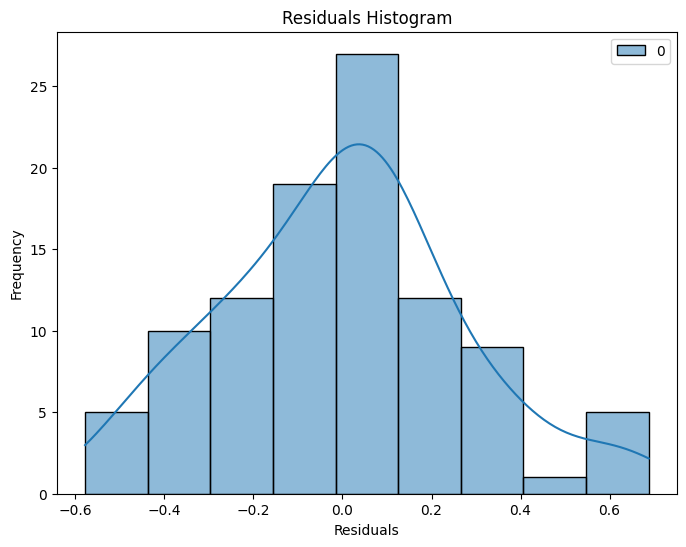


Mean of residuals: 0.0000


In [19]:
# Histogram
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

print()
print('='*35)
mean_residuals = np.mean(residuals)
print(f"Mean of residuals: {mean_residuals:.4f}")
print('='*35)

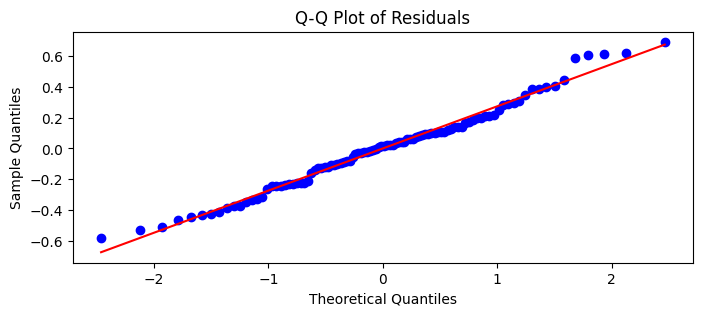


Mean of residuals: 0.0000


In [16]:
# Q-Q plot
from scipy import stats

plt.figure(figsize=(8, 3))
stats.probplot(residuals.flatten(), plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()
print()
print('='*35)

mean_residuals = np.mean(residuals)
print(f"Mean of residuals: {mean_residuals:.4f}")
print('='*35)

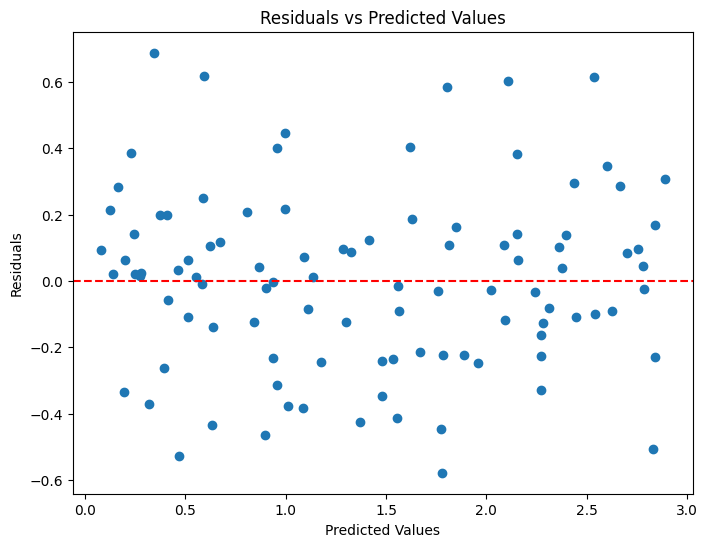

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## a non-normal distribution

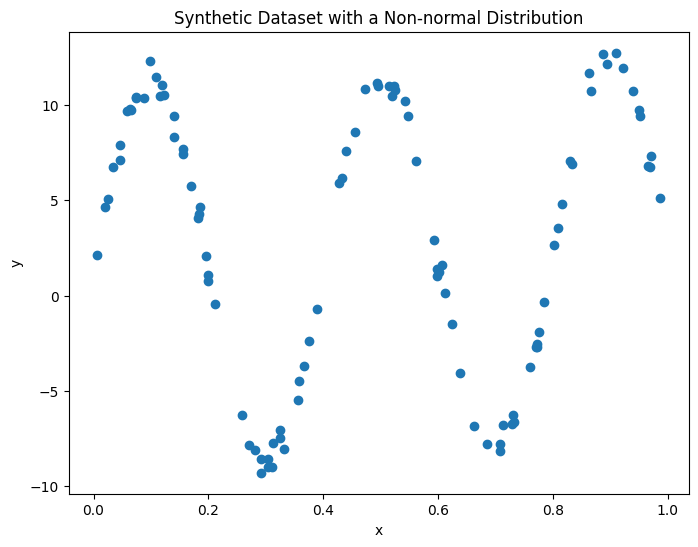

In [21]:
np.random.seed(42)

# Generate a synthetic dataset with a non-normal distribution
x = np.random.rand(100, 1)
y = np.exp(x) + 10*np.sin(5*np.pi*x) + np.random.normal(0, 0.5, (100, 1))

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Dataset with a Non-normal Distribution')
plt.show()

In [24]:
# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred


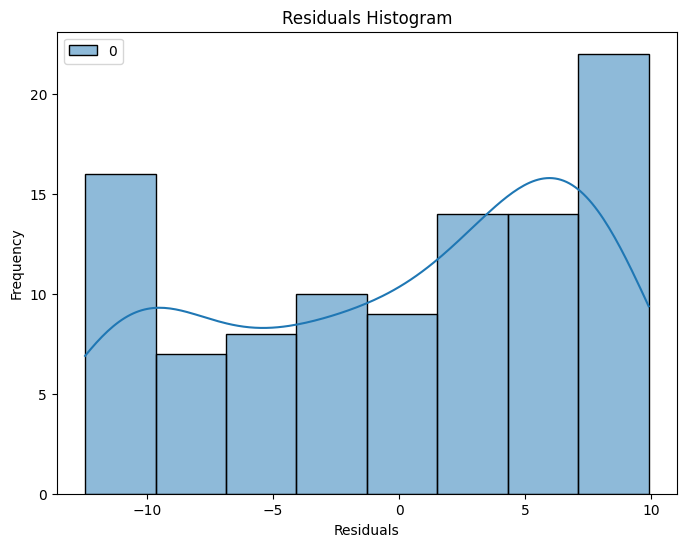

In [25]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

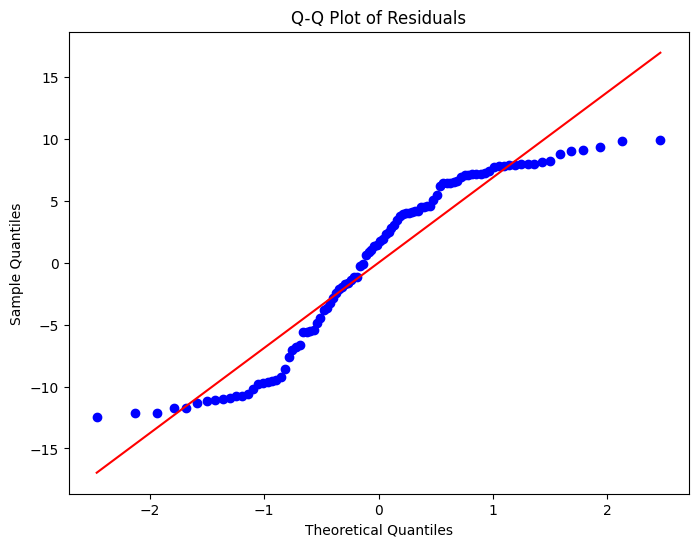

In [26]:
# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals.flatten(), plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

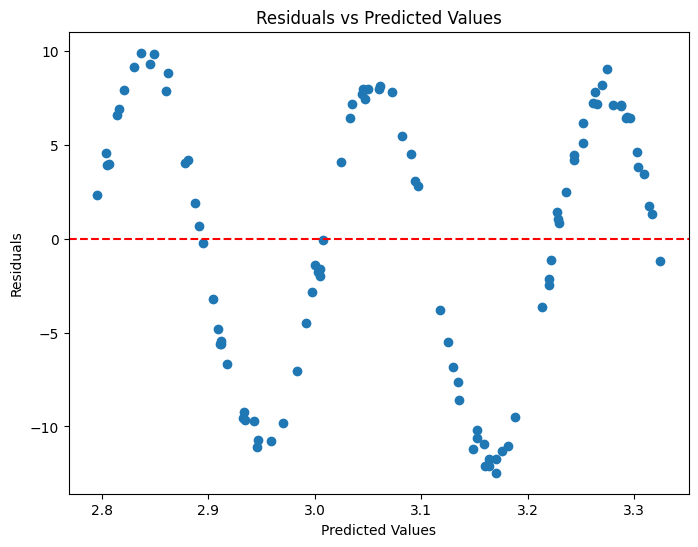

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Omnibus Test for normal distribution

In [29]:
# Generate a synthetic dataset
np.random.seed(42)
x = np.random.rand(100, 1)
y = 3 * x + np.random.normal(0, 0.3, (100, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred

# Calculate skewness, kurtosis, Omnibus test statistic, and p-value
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
omnibus_stat, omnibus_p_value = stats.normaltest(residuals)
print('='*35)
print(f"Skewness: {skewness[0]:.4f}")
print(f"Kurtosis: {kurtosis[0]:.4f}")
print(f"Omnibus test statistic: {omnibus_stat[0]:.4f}")
print(f"Omnibus test p-value: {omnibus_p_value[0]:.4f}")
print('='*35)

Skewness: 0.2173
Kurtosis: -0.0712
Omnibus test statistic: 0.9002
Omnibus test p-value: 0.6376


# Omnibus Test for non-normal distribution

In [31]:
np.random.seed(42)

# Generate a synthetic dataset with a non-normal distribution
x = np.random.rand(100, 1)
y = np.exp(x) + 10*np.sin(5*np.pi*x) + np.random.normal(0, 0.5, (100, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred

# Calculate skewness, kurtosis, Omnibus test statistic, and p-value
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
omnibus_stat, omnibus_p_value = stats.normaltest(residuals)
print('='*35)
print(f"Skewness: {skewness[0]:.4f}")
print(f"Kurtosis: {kurtosis[0]:.4f}")
print(f"Omnibus test statistic: {omnibus_stat[0]:.4f}")
print(f"Omnibus test p-value: {omnibus_p_value[0]:.4f}")
print('='*35)

Skewness: -0.3717
Kurtosis: -1.2746
Omnibus test statistic: 50.6234
Omnibus test p-value: 0.0000


In [34]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data
x = np.linspace(0, 10, 100)

# Homoscedastic dataset
y1 = 2 * x + 1 + np.random.normal(0, 1, len(x))

# Heteroscedastic dataset
y2 = 2 * x + 1 + np.random.normal(0, x, len(x))

# Fit linear models
coeffs1 = np.polyfit(x, y1, 1)
y1_pred = np.polyval(coeffs1, x)
residuals1 = y1 - y1_pred

coeffs2 = np.polyfit(x, y2, 1)
y2_pred = np.polyval(coeffs2, x)
residuals2 = y2 - y2_pred

# Homoscedastic Dataset

Text(0, 0.5, 'y1')

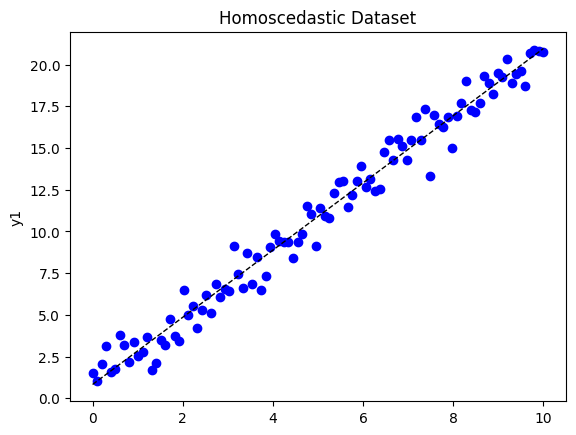

In [36]:
# Plot dataset 1
plt.scatter(x, y1, color='blue')
plt.plot(x, y1_pred, color='black', linestyle='--', lw=1)
plt.title('Homoscedastic Dataset')
plt.ylabel('y1')

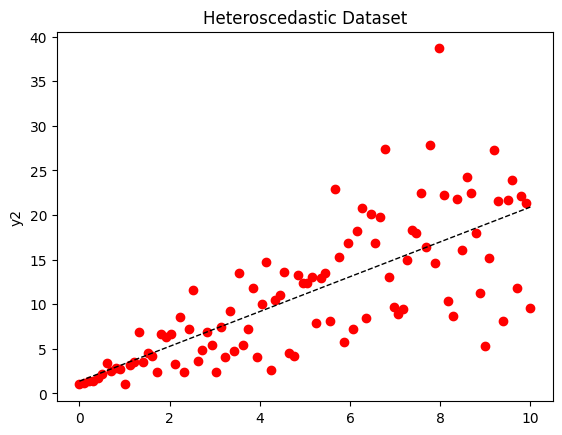

In [38]:
# Plot dataset 2
plt.scatter(x, y2, color='red')
plt.plot(x, y2_pred, color='black', linestyle='--', lw=1)
plt.title('Heteroscedastic Dataset')
plt.ylabel('y2')
plt.show()

Text(0, 0.5, 'Residuals')

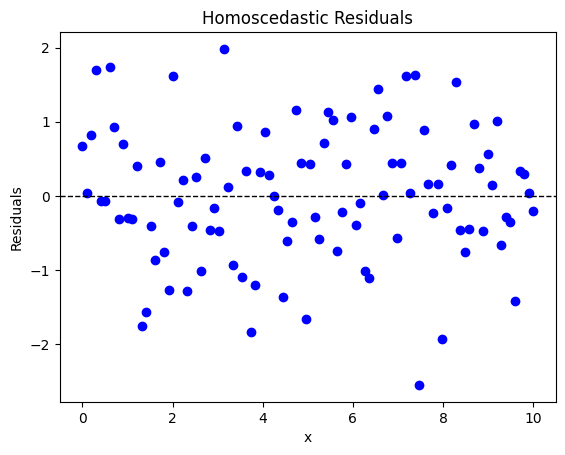

In [39]:
# Plot residuals for dataset 1
plt.scatter(x, residuals1, color='blue')
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.title('Homoscedastic Residuals')
plt.xlabel('x')
plt.ylabel('Residuals')

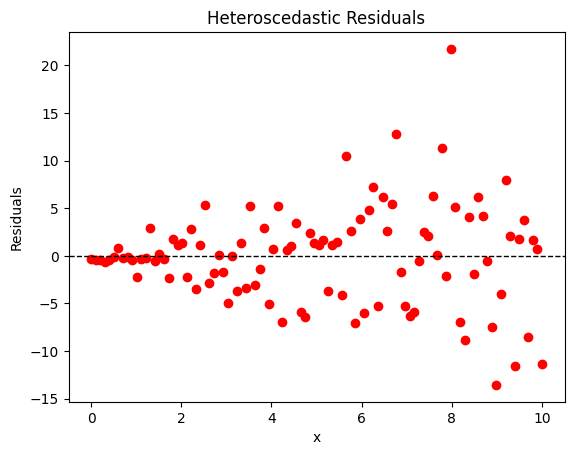

In [40]:
# Plot residuals for dataset 2
plt.scatter(x, residuals2, color='red')
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.title('Heteroscedastic Residuals')
plt.xlabel('x')
plt.ylabel('Residuals')

plt.show()

# Heteroscedasticity

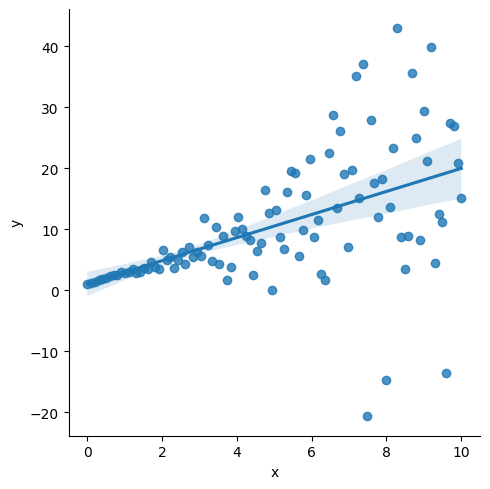

In [32]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with more pronounced heteroscedasticity
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, (0.5 * x) ** 2, len(x))

# Create a DataFrame with the generated data
data = {'x': x, 'y': y}
df = pd.DataFrame(data)

# Plot the lmplot with confidence intervals
sns.lmplot(x='x', y='y', data=df, ci=95)
plt.show()